In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Summary Statistics

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Exploring Target Variable

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['cap-shape']=LE.fit_transform(df['cap-shape'])
df['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1])

In [10]:
df['cap-surface']=LE.fit_transform(df['cap-surface'])
df['cap-surface'].unique()

array([2, 3, 0, 1])

In [11]:
list=['cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat','class']

for item in list:
    df[item]=LE.fit_transform(df[item])
    print(df[item].unique())

[4 9 8 3 2 5 0 7 1 6]
[1 0]
[6 0 3 5 2 1 8 7 4]
[1 0]
[0 1]
[1 0]
[ 4  5  2  7 10  3  9  1  0  8 11  6]
[0 1]
[3 2 1 4 0]
[2 0 1 3]
[2 0 3 1]
[7 3 6 4 0 2 5 1 8]
[7 6 3 0 4 2 8 5 1]
[2 0 1 3]
[1 2 0]
[4 0 2 1 3]
[2 3 6 1 7 5 4 8 0]
[3 2 0 4 5 1]
[5 1 3 0 4 6 2]
[1 0]


# Data Visualizations

To check missing values

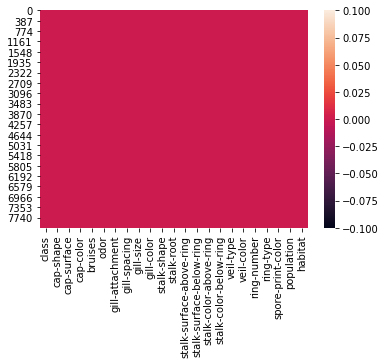

In [12]:
sns.heatmap(df.isnull())

Observations:-
    
    1. There is no missing values in the dataset.

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,p,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,p,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,p,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,p,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,p,2,1,0,3,0,1


# Univariate Analysis

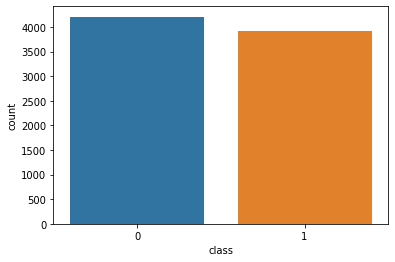

In [14]:
sns.countplot(x='class',data=df)

Observations:-
    
1. Class 0 (e - edilble ) is present comparatively more in the dataset than class 0 (p-poisonous).

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['cap-shape']=LE.fit_transform(df['cap-shape'])
df['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1], dtype=int64)

In [16]:
df['cap-surface']=LE.fit_transform(df['cap-surface'])
df['cap-surface'].unique()

array([2, 3, 0, 1], dtype=int64)

In [17]:
list=['cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat','class']

for item in list:
    df[item]=LE.fit_transform(df[item])
    print(df[item].unique())

[4 9 8 3 2 5 0 7 1 6]
[1 0]
[6 0 3 5 2 1 8 7 4]
[1 0]
[0 1]
[1 0]
[ 4  5  2  7 10  3  9  1  0  8 11  6]
[0 1]
[3 2 1 4 0]
[2 0 1 3]
[2 0 3 1]
[7 3 6 4 0 2 5 1 8]
[7 6 3 0 4 2 8 5 1]
[2 0 1 3]
[1 2 0]
[4 0 2 1 3]
[2 3 6 1 7 5 4 8 0]
[3 2 0 4 5 1]
[5 1 3 0 4 6 2]
[1 0]


In [18]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,p,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,p,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,p,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,p,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,p,2,1,0,3,0,1


# To check correlation

In [19]:
dfcor=df.corr()
dfcor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


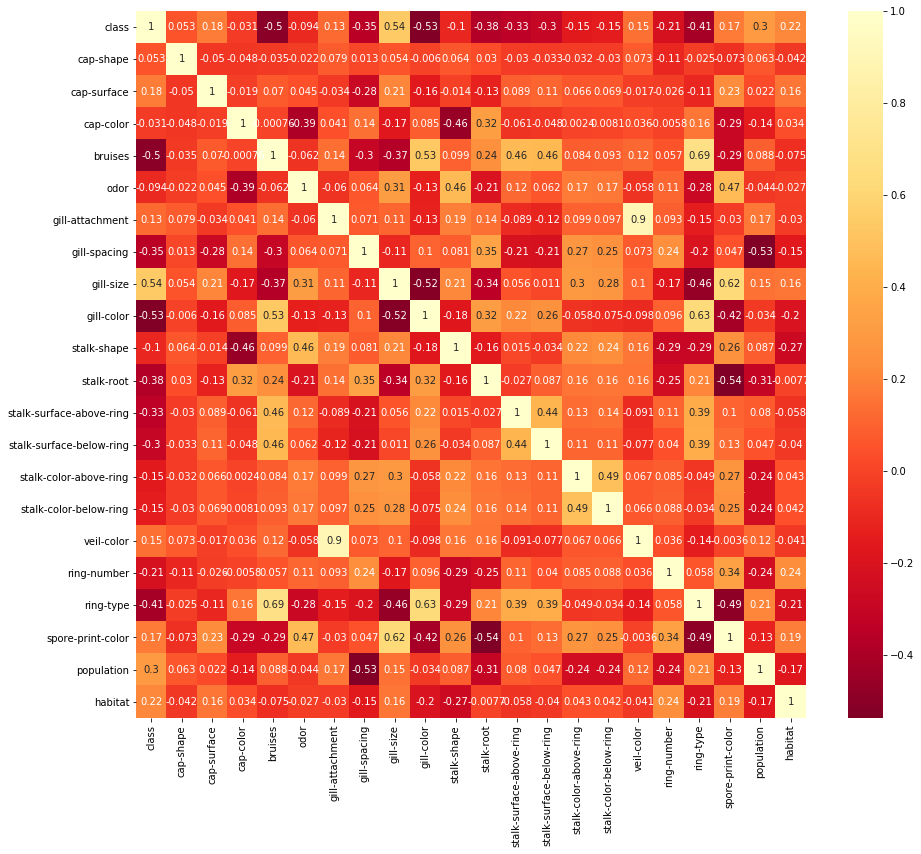

In [20]:
# Multivariate Analysis
plt.figure(figsize=(15,13))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations:-
    
1. class is highly positively correlated with gill-size.
2. gill-size is highly negatively correlated with gill-color.
3. gill-color is highly positively correlated with ring-type.
4. gill-color is highly negatively correlated with class.

# Bivariate Analysis

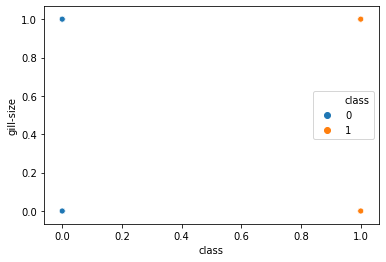

In [21]:
sns.scatterplot(x='class',y='gill-size',data=df,hue='class')

Observations:-
    
1. Both classes have approximately same gill-size .

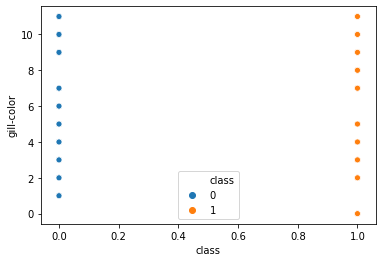

In [22]:
sns.scatterplot(x='class',y='gill-color',data=df,hue='class')

Observations:-
    
1. Class 0 has gill-colours ranging from 1 to 7 and then 9 to 11.
2. Class 1 has gill-colours ranging from 0 to 5 and then 7 to 11.

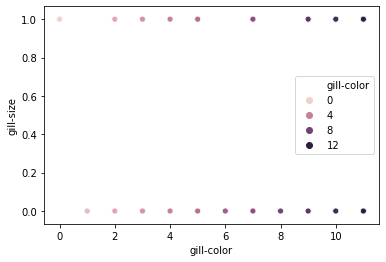

In [23]:
sns.scatterplot(x='gill-color',y='gill-size',data=df,hue='gill-color')

Observations:-
    
1. All gill-colors are either of 0 gill-size or 1 gill-size and no in between.

# Plotting Outliers

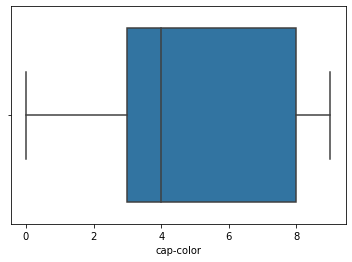

In [24]:
sns.boxplot(df['cap-color'])


Observations:-
    
1. No outlier is present in cap-color.

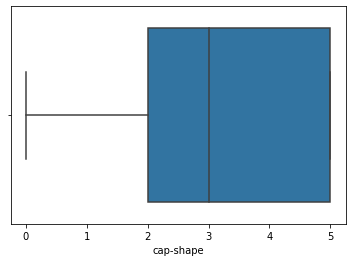

In [25]:
sns.boxplot(df['cap-shape'])

Observations:-
    
1. No outlier is present in cap-shape.

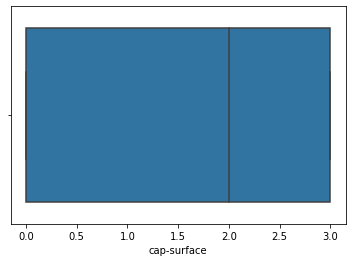

In [26]:
sns.boxplot(df['cap-surface'])

Observations:-
    
1. No outlier is present in cap-surface.

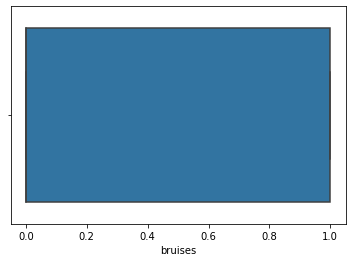

In [27]:
sns.boxplot(df['bruises'])

Observations:-
    
1. No outlier is present in bruises.

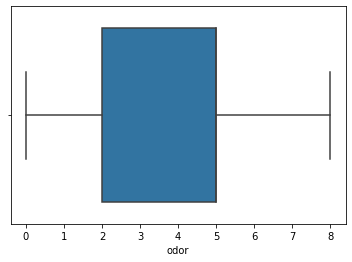

In [28]:
sns.boxplot(df['odor'])

Observations:-

1. No outlier is present in bruises.

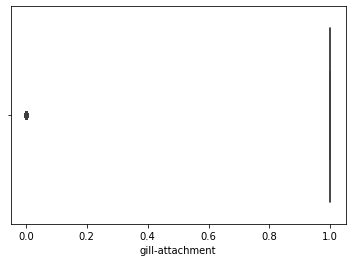

In [29]:
sns.boxplot(df['gill-attachment'])

Observations:-

1. Outlier is present in gill-attachment.


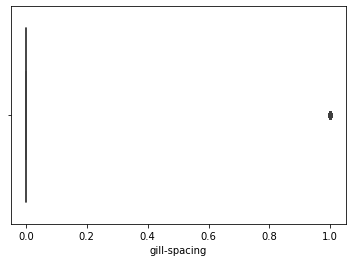

In [30]:
sns.boxplot(df['gill-spacing'])

Observations:-

1. Outlier is present in gill-spacing.

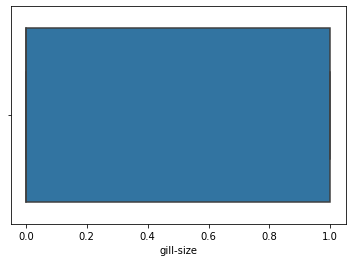

In [31]:
sns.boxplot(df['gill-size'])

Observations:-

1. No outlier is present in gill-size.

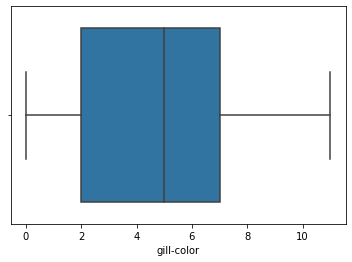

In [32]:
sns.boxplot(df['gill-color'])

Observations:-

1. No outlier is present in gill-color.

In [33]:
df_1=df.drop(['class','cap-color','cap-shape','cap-surface','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','veil-type'],axis=1)

In [34]:
df_1.head()

,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,2,2,7,7,2,1,4,2,3,5
1,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,2,2,7,7,2,1,4,3,2,3
3,0,3,2,2,7,7,2,1,4,2,3,5
4,1,3,2,2,7,7,2,1,0,3,0,1


In [35]:
df_1.shape

(8124, 12)

stalk-shape                    AxesSubplot(0.125,0.787927;0.352273x0.0920732)
stalk-root                  AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
stalk-surface-above-ring       AxesSubplot(0.125,0.677439;0.352273x0.0920732)
stalk-surface-below-ring    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
stalk-color-above-ring         AxesSubplot(0.125,0.566951;0.352273x0.0920732)
stalk-color-below-ring      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
veil-color                     AxesSubplot(0.125,0.456463;0.352273x0.0920732)
ring-number                 AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
ring-type                      AxesSubplot(0.125,0.345976;0.352273x0.0920732)
spore-print-color           AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
population                     AxesSubplot(0.125,0.235488;0.352273x0.0920732)
habitat                     AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

<Figure size 144x432 with 0 Axes>

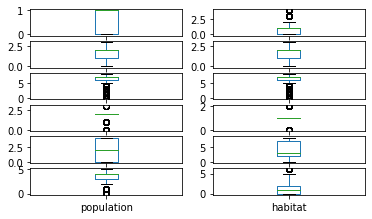

In [36]:
plt.figure(figsize=(2,6))
df_1.plot(kind='box',subplots=True,layout=(7,2))


Observations:-
    
1. stalk-root, stalk-color-above-ring,stalk-surface-below-ring,veil-color,ring-number,population,habitat have outliers

In [37]:
df['veil-type']=LE.fit_transform(df['veil-type'])
df['veil-type'].head()

0    0
1    0
2    0
3    0
4    0
Name: veil-type, dtype: int32

# Removing Outliers

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 17,  6, 17], dtype=int64))


In [39]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [40]:
df_new.shape

(0, 23)

In [41]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [42]:
df.shape

(8124, 23)

As here we are loosing 100% data after using zscore method. So, we will not remove outliers in this dataset.

# To check skewness

In [43]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

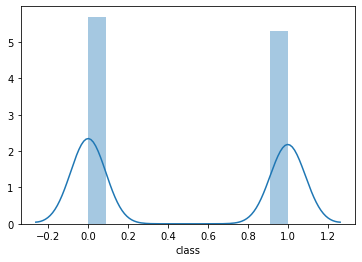

In [44]:
sns.distplot(df['class'])

Observations :-
    
1. Data of class coluumn is not skewed.

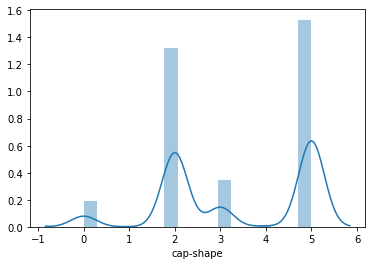

In [45]:
sns.distplot(df['cap-shape'])

Observations :-
    
1. Data of cap-shape coluumn is not skewed.

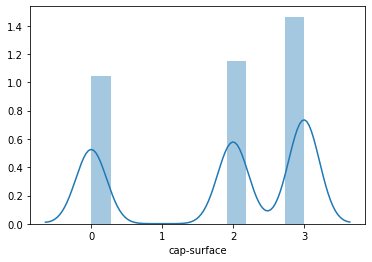

In [46]:
sns.distplot(df['cap-surface'])

Observations:-
    
1. Data of cap-shape coluumn is slightly left skewed.

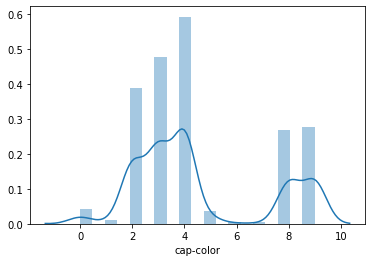

In [47]:
sns.distplot(df['cap-color'])

Observations:-
    
1. Data of cap-color coluumn is right skewed.

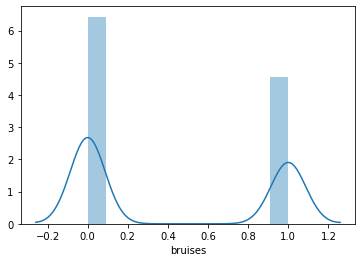

In [48]:
sns.distplot(df['bruises'])

Observations:-
    
1. Data of bruises coluumn is not skewed.

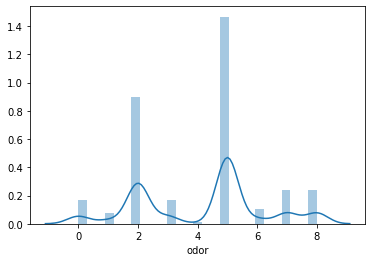

In [49]:
sns.distplot(df['odor'])

Observations:-
    
1. Data of odour column is not skewed.

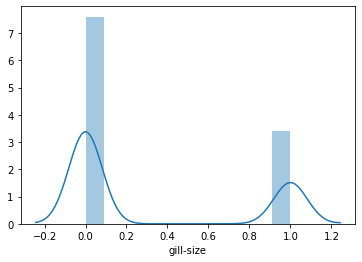

In [50]:
sns.distplot(df['gill-size'])

Observations:-
    
1. Data of gill-size column is right skewed.

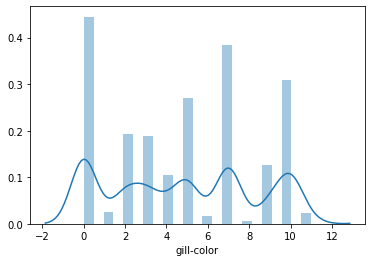

In [51]:
sns.distplot(df['gill-color'])

Observations:-

1. Data of gill-color column is not skewed.

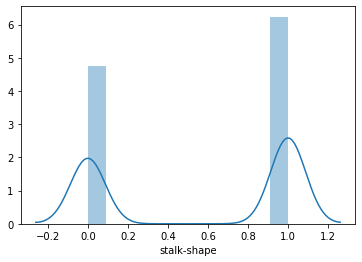

In [52]:
sns.distplot(df['stalk-shape'])

Observations:-

1. Data of stalk-shape is not skewed.

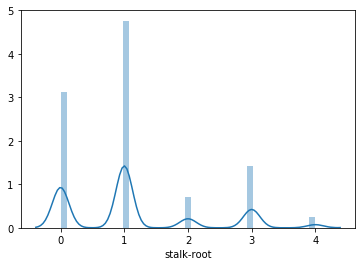

In [53]:
sns.distplot(df['stalk-root'])

Observations:-

1. Data of stalk-root is right skewed.

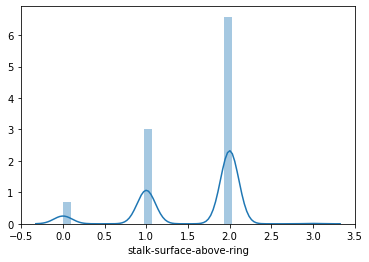

In [54]:
sns.distplot(df['stalk-surface-above-ring'])

Observations:-

1. Data of stalk-surface-above-ring  is left skewed.

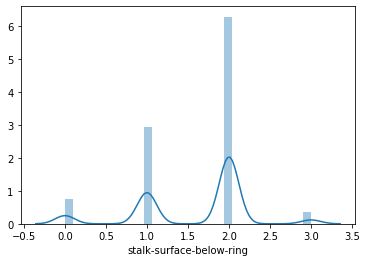

In [55]:
sns.distplot(df['stalk-surface-below-ring'])

Observations:-

1. Data of stalk-surface-below-ring  is left skewed.

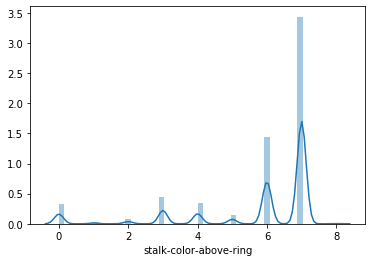

In [56]:
sns.distplot(df['stalk-color-above-ring'])

Observations:-

1. Data of stalk-color-above-ring  is left skewed.

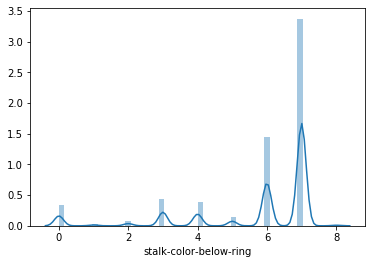

In [57]:
sns.distplot(df['stalk-color-below-ring'])

Observations:-

1. Data of stalk-color-below-ring  is left skewed.

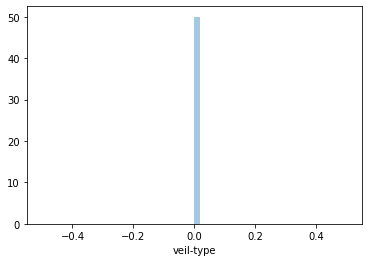

In [58]:
sns.distplot(df['veil-type'])

Observations:-

1. Data of veil-type is not skewed.

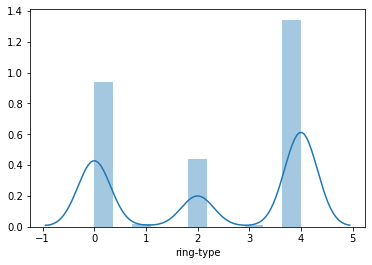

In [59]:
sns.distplot(df['ring-type'])

Observations:-

1. Data of ring-type is not skewed.

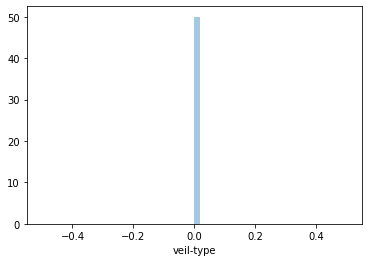

In [60]:
sns.distplot(df['veil-type'])

Observations:-

1. Data of veil-type is not skewed.

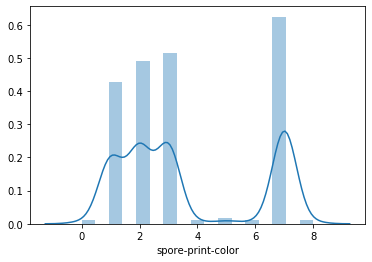

In [61]:
sns.distplot(df['spore-print-color'])

Observations:-

1. Data of spore-print-color is slightly right skewed.

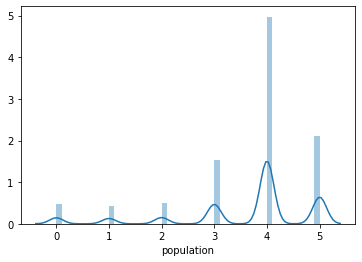

In [62]:
sns.distplot(df['population'])


Observations:-

1. Data of population is left skewed.

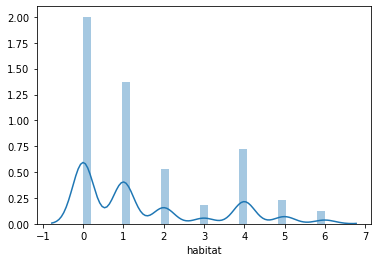

In [63]:
sns.distplot(df['habitat'])

Observations:-

1. Data of habitat is right skewed.

In [64]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

cap-color , gill-attachment, gill-spacing, gill-size, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, 
stalk-color-above-ring, stalk-color-below-ring, veil-color, ring-number, population and habitat are highly skewed. 

In [65]:
np.log(df['cap-color'])
df['cap-color']=df['cap-color'].skew()

from logarithm the value is 0.7069648306800983

--And then Using sqrt after log---

In [66]:
np.sqrt(df['cap-color'])

0       0.840812
1       0.840812
2       0.840812
3       0.840812
4       0.840812
          ...   
8119    0.840812
8120    0.840812
8121    0.840812
8122    0.840812
8123    0.840812
Name: cap-color, Length: 8124, dtype: float64

In [67]:
df['cap-color']=df['cap-color'].skew()
df['cap-color'].skew()

0

from sqrt the value is 0.

In [68]:
np.log(df['gill-spacing'])
df['gill-spacing']=df['gill-spacing'].skew()

from logarithm the value is 1.8400882459138057

--And then Using sqrt after log---

In [69]:
df['gill-spacing']=np.sqrt(df['gill-spacing'])
df['gill-spacing'].skew()

0

from sqrt the value is 0.

In [70]:
np.log(df['gill-size'])
df['gill-size']=df['gill-size'].skew()

from logarithm the value is 0.8257968918825481

--And then Using sqrt after log---

In [71]:
df['gill-size']=np.sqrt(df['gill-size'])
df['gill-size'].skew()

0

from sqrt the value is 0.

In [72]:
np.log(df['stalk-root'])
df['stalk-root']=df['stalk-root'].skew()

In [73]:
df.shape

(8124, 23)

from logarithm the value is 0.947852361187689

--And then Using sqrt after log---

In [74]:
df['stalk-root']=np.sqrt(df['stalk-root'])
df['stalk-root'].skew()

0

In [75]:
df.shape

(8124, 23)

In [76]:
np.log(df['ring-number'])
df['ring-number']=df['ring-number'].skew()
print(df['ring-number'].skew())

0


In [77]:
df.shape

(8124, 23)

from logarithm the value is 2.701657257979159

--And then Using sqrt after log---

In [78]:
df['ring-number']=np.sqrt(df['ring-number'])
df['ring-number'].skew()

0

In [79]:
df.shape

(8124, 23)

In [80]:
np.log(df['habitat'])
df['habitat']=df['habitat'].skew()
print(df['habitat'].skew())

0


from logarithm the value is 0

In [81]:
np.cbrt(df['gill-attachment'])
df['gill-attachment']=df['gill-attachment'].skew()
print(df['gill-attachment'].skew())

0


In [82]:
np.cbrt(df['stalk-surface-above-ring'])
df['stalk-surface-above-ring']=df['stalk-surface-above-ring'].skew()
print(df['stalk-surface-above-ring'].skew())

0


In [83]:
np.cbrt(df['stalk-surface-below-ring'])
df['stalk-surface-below-ring']=df['stalk-surface-below-ring'].skew()
print(df['stalk-surface-below-ring'].skew())

0


In [84]:
np.cbrt(df['stalk-color-above-ring'])
df['stalk-color-above-ring']=df['stalk-color-above-ring'].skew()
print(df['stalk-color-above-ring'].skew())

0


In [85]:
np.cbrt(df['stalk-color-below-ring'])
df['stalk-color-below-ring']=df['stalk-color-below-ring'].skew()
print(df['stalk-color-below-ring'].skew())

0


In [86]:
np.cbrt(df['veil-color'])
df['veil-color']=df['veil-color'].skew()
print(df['veil-color'].skew())

0


In [87]:
np.cbrt(df['population'])
df['population']=df['population'].skew()
print(df['population'].skew())

0


In [88]:
df.shape

(8124, 23)

In [89]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.000000
bruises                     0.342750
odor                       -0.080790
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.000000
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-type                   0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.290018
spore-print-color           0.548426
population                  0.000000
habitat                     0.000000
dtype: float64

In [90]:
np.cbrt(df['cap-surface'])
df['cap-surface']=df['cap-surface'].skew()
print(df['cap-surface'].skew())

0


In [91]:
np.log(df['spore-print-color'])
df['spore-print-color']=df['spore-print-color'].skew()
print(df['spore-print-color'].skew())

0


In [92]:
df.shape

(8124, 23)

In [93]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                 0.000000
cap-color                   0.000000
bruises                     0.342750
odor                       -0.080790
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.000000
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-type                   0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.290018
spore-print-color           0.000000
population                  0.000000
habitat                     0.000000
dtype: float64

In [94]:
df.shape

(8124, 23)

In [95]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,-0.590859,0,1,6,-5.977076,1.356499,0.908734,4,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,4,0.548426,-1.413096,0.985548
1,0,5,-0.590859,0,1,0,-5.977076,1.356499,0.908734,4,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,4,0.548426,-1.413096,0.985548
2,0,0,-0.590859,0,1,3,-5.977076,1.356499,0.908734,5,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,4,0.548426,-1.413096,0.985548
3,1,5,-0.590859,0,1,6,-5.977076,1.356499,0.908734,5,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,4,0.548426,-1.413096,0.985548
4,0,5,-0.590859,0,0,5,-5.977076,1.356499,0.908734,4,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,0,0.548426,-1.413096,0.985548


In [96]:
x=df[[ 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

In [97]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,-0.590859,0,1,6,-5.977076,1.356499,0.908734,4,0,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,4,0.548426,-1.413096,0.985548
1,5,-0.590859,0,1,0,-5.977076,1.356499,0.908734,4,0,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,4,0.548426,-1.413096,0.985548
2,0,-0.590859,0,1,3,-5.977076,1.356499,0.908734,5,0,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,4,0.548426,-1.413096,0.985548
3,5,-0.590859,0,1,6,-5.977076,1.356499,0.908734,5,0,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,4,0.548426,-1.413096,0.985548
4,5,-0.590859,0,0,5,-5.977076,1.356499,0.908734,4,1,...,-0.757703,-1.835434,-1.791593,0,-6.946944,1.643672,0,0.548426,-1.413096,0.985548


In [98]:
y=df['class']

In [99]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of is:
0.7768456375838926
[[671 240]
 [159 718]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       911
           1       0.75      0.82      0.78       877

    accuracy                           0.78      1788
   macro avg       0.78      0.78      0.78      1788
weighted avg       0.78      0.78      0.78      1788

Accuracy score of is:
0.7869127516778524
[[713 233]
 [148 694]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       946
           1       0.75      0.82      0.78       842

    accuracy                           0.79      1788
   macro avg       0.79      0.79      0.79      1788
weighted avg       0.79      0.79      0.79      1788

Accuracy score of is:
0.7555928411633109
[[676 254]
 [183 675]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       930
           1       0.73      0.79      0.76  

Best accuracy is 0.8014541387024608 on Random_state 44

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=44)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of is:
0.8014541387024608
[[697 200]
 [155 736]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       897
           1       0.79      0.83      0.81       891

    accuracy                           0.80      1788
   macro avg       0.80      0.80      0.80      1788
weighted avg       0.80      0.80      0.80      1788



In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=44)
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_d

In [103]:
gd_sr.best_params_

{'criterion': 'gini'}

In [104]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of is:
0.9949664429530202
[[897   0]
 [  9 882]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       897
           1       1.00      0.99      0.99       891

    accuracy                           0.99      1788
   macro avg       1.00      0.99      0.99      1788
weighted avg       1.00      0.99      0.99      1788



In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=44)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of is:
0.8014541387024608
[[697 200]
 [155 736]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       897
           1       0.79      0.83      0.81       891

    accuracy                           0.80      1788
   macro avg       0.80      0.80      0.80      1788
weighted avg       0.80      0.80      0.80      1788



In [106]:
parameters={'kernel':['rbf','poly','linear'],'C':[1,10]}
svm=SVC()
GVC=GridSearchCV(estimator=SVC(),param_grid=parameters,scoring='accuracy',cv=5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [107]:
GVC.best_params_

{'C': 10, 'kernel': 'poly'}

In [108]:
svm=SVC(kernel='poly',C=10)
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
print('Accuracy score of','is:')
accu_score=accuracy_score(y_test,predsvm)
print(accuracy_score(y_test,predsvm))
print(confusion_matrix(y_test,predsvm))
print(classification_report(y_test,predsvm))

Accuracy score of is:
0.9552572706935123
[[885  12]
 [ 68 823]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       897
           1       0.99      0.92      0.95       891

    accuracy                           0.96      1788
   macro avg       0.96      0.96      0.96      1788
weighted avg       0.96      0.96      0.96      1788



# Ensembler Techniques

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=44)
rf.fit(x_train,y_train)
predrf=svm.predict(x_test)
print('Accuracy score o..lf','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score o..lf is:
0.9552572706935123
[[885  12]
 [ 68 823]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       897
           1       0.99      0.92      0.95       891

    accuracy                           0.96      1788
   macro avg       0.96      0.96      0.96      1788
weighted avg       0.96      0.96      0.96      1788



In [110]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score o..lf','is:')
accu_score=accuracy_score(y_test,predad)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


Accuracy score o..lf is:
0.9848993288590604
[[891   6]
 [ 21 870]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       897
           1       0.99      0.98      0.98       891

    accuracy                           0.98      1788
   macro avg       0.99      0.98      0.98      1788
weighted avg       0.99      0.98      0.98      1788



In [111]:
ade=AdaBoostClassifier(n_estimators=50)
ade.fit(x_train,y_train)
predade=ade.predict(x_test)
print('Accuracy score o..lf','is:')
accu_score=accuracy_score(y_test,predade)
print(accuracy_score(y_test,predade))
print(confusion_matrix(y_test,predade))
print(classification_report(y_test,predade))

Accuracy score o..lf is:
0.9848993288590604
[[891   6]
 [ 21 870]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       897
           1       0.99      0.98      0.98       891

    accuracy                           0.98      1788
   macro avg       0.99      0.98      0.98      1788
weighted avg       0.99      0.98      0.98      1788



In [112]:
svm=SVC()
adal=AdaBoostClassifier(n_estimators=50,base_estimator=svm,algorithm='SAMME')
adal.fit(x_train,y_train)
predadal=adal.predict(x_test)
print('Accuracy score o..lf','is:')
accu_score=accuracy_score(y_test,predadal)
print(accuracy_score(y_test,predadal))
print(confusion_matrix(y_test,predadal))
print(classification_report(y_test,predadal))


Accuracy score o..lf is:
0.5016778523489933
[[897   0]
 [891   0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       897
           1       0.00      0.00      0.00       891

    accuracy                           0.50      1788
   macro avg       0.25      0.50      0.33      1788
weighted avg       0.25      0.50      0.34      1788



As per Accuracy Score, Decision Tree is the best algorithm with 0.9949664429530202 as accuracy score.

# Cross - Validation

In [113]:
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.57292308 0.616      0.75815385 0.99630769 0.66071429]
0.7208197802197802 0.15083813432075627


In [114]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.84246154 0.99630769 0.96430769 1.         0.76908867]
0.9144331186055326 0.09253921030098186


In [115]:
svcscores=cross_val_score(svm,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.57784615 0.95753846 0.78953846 0.99876923 0.63669951]
0.7920783630162941 0.16741722631608735


In [116]:
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.78276923 0.99815385 0.95692308 1.         0.73768473]
0.8951061765820386 0.11211063026885958


In [117]:
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.90153846 0.99630769 0.97169231 1.         0.8023399 ]
0.9343756726032588 0.07489510792103081


In [118]:
adscores=cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.84184615 0.99138462 0.94030769 1.         0.85283251]
0.9252741947707465 0.0669157307343973


In [119]:
adescores=cross_val_score(ade,x,y,cv=5)
print(adescores)
print(adescores.mean(),adescores.std())

[0.84184615 0.99138462 0.94030769 1.         0.85283251]
0.9252741947707465 0.0669157307343973


In [120]:
adalscores=cross_val_score(adal,x,y,cv=5)
print(adalscores)
print(adalscores.mean(),adalscores.std())

[0.51753846 0.51815385 0.51815385 0.51815385 0.51785714]
0.5179714285714285 0.00024509190082552893


In [121]:
list1=[0.8014541387024608,0.9949664429530202,0.8014541387024608,0.9552572706935123,0.9552572706935123,0.9848993288590604
       ,0.9848993288590604,0.5016778523489933]
list2=[0.7208197802197802,0.9144331186055326,0.8951061765820386,0.7920783630162941,0.9343756726032588,0.9252741947707465
      ,0.9252741947707465,0.5179714285714285]

difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.08063435848268063, 0.08053332434748761, -0.09365203787957777, 0.1631789076772182, 0.020881598090253473, 0.059625134088313936, 0.059625134088313936, -0.016293576222435213]


As per the accuracy scores, Decision Tree was the best algorithm.
And the difference between CV and Accuracy Score of Decision Tree is only 0.08053332434748761 .
So, Decision Tree is the best algorithm here.


# Saving the best model

In [122]:
import joblib

In [123]:
joblib.dump(rf,'dtcmushroommodel.obj')

['dtcmushroommodel.obj']